## BI 1st Pract

In [5]:
import re
import pandas as pd

def find_motifs(sequence, motif):
    """Find all positions (1-based) of a motif in the sequence."""
    sequence = sequence.upper()
    motif = motif.upper()
    matches = [m.start() + 1 for m in re.finditer(f"(?={motif})", sequence)]
    return matches

def calculate_gc_content(sequence):
    """Calculate GC content (%) of the DNA sequence."""
    sequence = sequence.upper()
    gc_count = sequence.count("G") + sequence.count("C")
    return round((gc_count / len(sequence)) * 100, 2)

def identify_coding_regions(sequence):
    """Find coding regions (ORFs) based on ATG...STOP."""
    sequence = sequence.upper()
    stop_codons = {"TAA", "TAG", "TGA"}
    coding_regions = []

    for frame in range(3):
        i = frame
        while i < len(sequence) - 2:
            codon = sequence[i:i+3]
            if codon == "ATG":
                found_stop = False
                for j in range(i+3, len(sequence)-2, 3):
                    stop = sequence[j:j+3]
                    if stop in stop_codons:
                        coding_regions.append((i+1, j+3))
                        i = j + 3
                        found_stop = True
                        break
                if not found_stop:
                    i += 3
            else:
                i += 3
    return coding_regions

def main():
    """Analyzes all DNA sequences from the dataset."""
    # Load dataset
    df = pd.read_csv(r"C:\Users\athar\OneDrive\Desktop\Practical\Bioinformatics\human.txt", sep="\t")

    results = []
    for idx, row in df.iterrows():
        sequence = row["sequence"]

        motifs = find_motifs(sequence, "TAT")
        gc_content = calculate_gc_content(sequence)
        coding_regions = identify_coding_regions(sequence)

        results.append({
            "Index": idx,
            "Class": row["class"],
            "GC_Content(%)": gc_content,
            "Motif_Positions(TAT)": motifs if motifs else "None",
            "Coding_Regions": coding_regions if coding_regions else "None"
        })

    results_df = pd.DataFrame(results)
    print(results_df)

if __name__ == "__main__":
    main()


      Index  Class  GC_Content(%)  \
0         0      4          39.61   
1         1      4          44.20   
2         2      3          43.12   
3         3      3          41.79   
4         4      3          42.73   
...     ...    ...            ...   
4375   4375      0          29.82   
4376   4376      6          52.10   
4377   4377      6          51.88   
4378   4378      6          55.11   
4379   4379      6          57.30   

                                   Motif_Positions(TAT)  \
0                                     [23, 59, 83, 139]   
1     [74, 86, 106, 210, 218, 234, 293, 297, 323, 34...   
2     [63, 199, 205, 313, 345, 418, 470, 553, 610, 6...   
3     [63, 199, 205, 313, 345, 418, 470, 553, 610, 6...   
4     [64, 96, 169, 221, 304, 361, 397, 521, 592, 66...   
...                                                 ...   
4375                                       [23, 43, 49]   
4376  [352, 388, 454, 703, 778, 814, 850, 874, 888, ...   
4377  [352, 388, 454, 70

### BI Pract 2

Initial Data (first 5 rows):
         gene1  gene2  gene3  gene4  gene5  gene6  gene7  gene8  gene9  gene10
sample1     12     21      4    130     18      0     16     54     49       3
sample2      1     44      2     63     11     10     70     32     57       9
sample3      4      4     11    180     21      3     28     34     65       2
sample4      1     10      2    100     44      9     28     16     33       9
sample5      1     11      6    135     16      2     32     29     31       5
Using None as control genes, passed at DeseqDataSet initialization


Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.15 seconds.

Fitting dispersion trend curve...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.14 seconds.

Fitting LFCs...
... done in 0.15 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 0.21 seconds.



Log2 fold change & Wald test p-value: condition Treatment vs Control
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
sample1    15.948319       -0.593868  0.598062 -0.992987  0.320716  0.992720
sample2    20.071993        0.862193  0.635643  1.356412  0.174968  0.878444
sample3    17.982042       -0.403888  0.658829 -0.613038  0.539851  0.992720
sample4    15.513719        0.152065  0.623002  0.244084  0.807166  0.992720
sample5    13.329567       -0.154633  0.576663 -0.268152  0.788582  0.992720
...              ...             ...       ...       ...       ...       ...
sample96   15.487539        0.260864  0.589902  0.442216  0.658333  0.992720
sample97   12.889048       -0.036935  0.569008 -0.064911  0.948245  0.992720
sample98   16.679672       -0.037144  0.633230 -0.058658  0.953225  0.992720
sample99   24.093650       -0.016231  0.600110 -0.027047  0.978422  0.992720
sample100  20.405656        0.374718  0.674120  0.555863  0.578305  0.992720

[100 r

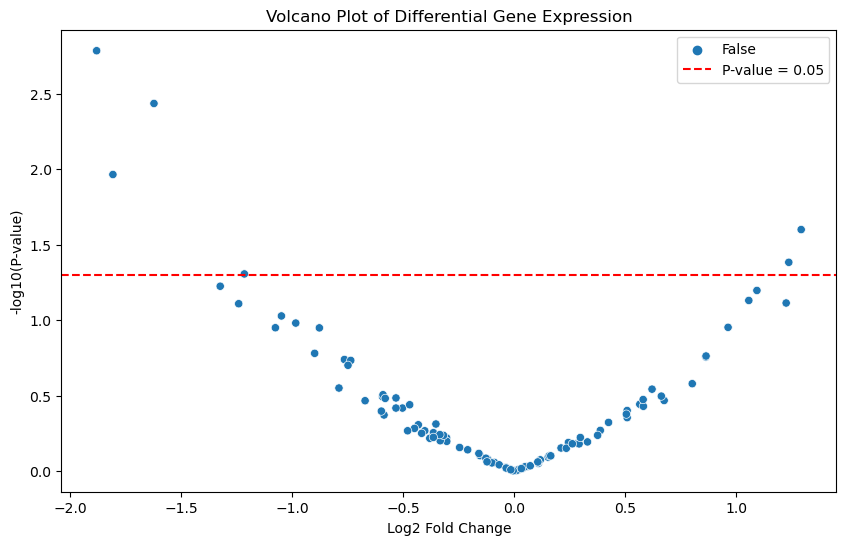

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pydeseq2.utils import load_example_data
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

import warnings
warnings.filterwarnings("ignore")

counts_df = load_example_data() # row gene columns samples

conditions = ['Control'] * (counts_df.shape[1] // 2) + ['Treatment'] * (counts_df.shape[1] // 2)
metadata_df = pd.DataFrame({'condition': conditions}, index=counts_df.columns)

print("Initial Data (first 5 rows):")
print(counts_df.head())


counts_t = counts_df.T  # row samples col genes


dds = DeseqDataSet(
    counts=counts_t,
    metadata=metadata_df,
    design_factors="condition"
)


dds.deseq2()


stat_res = DeseqStats(dds, contrast=("condition", "Treatment", "Control"))
stat_res.summary()
results_df = stat_res.results_df

print("\nDifferential Expression Results (first 10 rows):")
print(results_df.head(10))


plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=results_df,
    x="log2FoldChange",
    y=-np.log10(results_df["pvalue"]),
    hue=results_df["padj"] < 0.05
)
plt.axhline(y=-np.log10(0.05), color="red", linestyle="--", label="P-value = 0.05")
plt.xlabel("Log2 Fold Change")
plt.ylabel("-log10(P-value)")
plt.title("Volcano Plot of Differential Gene Expression")
plt.legend()
plt.show()

Initial Data (first 5 rows):
         gene1  gene2  gene3  gene4  gene5  gene6  gene7  gene8  gene9  gene10
sample1     12     21      4    130     18      0     16     54     49       3
sample2      1     44      2     63     11     10     70     32     57       9
sample3      4      4     11    180     21      3     28     34     65       2
sample4      1     10      2    100     44      9     28     16     33       9
sample5      1     11      6    135     16      2     32     29     31       5

Differential Expression Results (first 10 rows):
       Gene   Log2_FC  Fold_Change   P-value  Adj_P-value
0   sample1 -0.850094     0.554748  0.546202          1.0
1   sample2  1.234341     2.352738  0.320046          1.0
2   sample3 -0.114295     0.923834  0.932549          1.0
3   sample4  0.496461     1.410749  0.677744          1.0
4   sample5  0.110793     1.079822  0.930510          1.0
5   sample6  1.502536     2.833403  0.236271          1.0
6   sample7  0.655294     1.574937  0.614

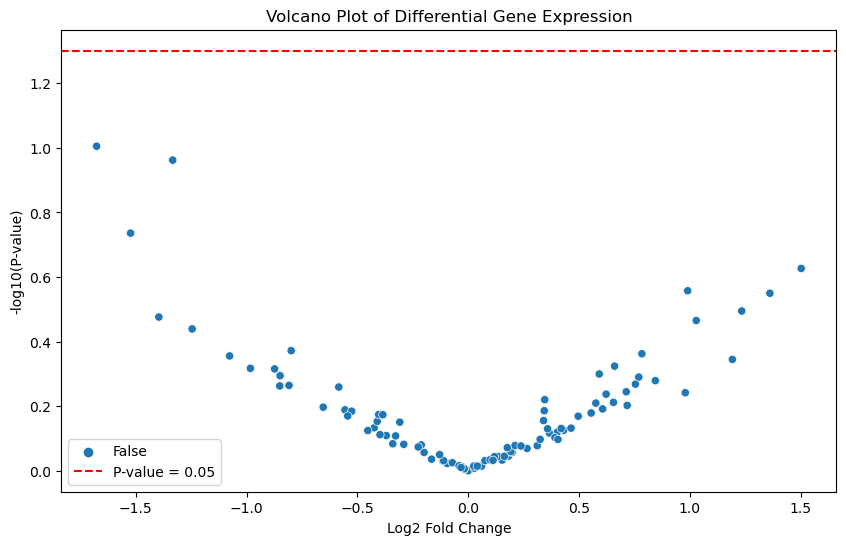

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt
import seaborn as sns
from pydeseq2.utils import load_example_data

# The load_example_data() function in your version returns a single DataFrame.
counts_df = load_example_data()

conditions = ['Control'] * (counts_df.shape[1] // 2) + ['Treatment'] * (counts_df.shape[1] // 2)
metadata_df = pd.DataFrame({'condition': conditions}, index=counts_df.columns)

print("Initial Data (first 5 rows):")
print(counts_df.head())

conditions = metadata_df['condition'].tolist()

df_log = np.log2(counts_df + 1)

# Differential Expression Analysis
results = []

for gene in df_log.index:
    
    y = df_log.loc[gene].values.astype(float)

    
    X = pd.get_dummies(conditions, drop_first=True).astype(float)

    # Add intercept
    X = sm.add_constant(X)

    # Fit OLS model
    model = sm.OLS(y, X).fit()

    # Extract fold change and p-value
    log2_fc = model.params.iloc[1]
    fold_change = 2 ** log2_fc
    p_value = model.pvalues.iloc[1]

    results.append([gene, log2_fc, fold_change, p_value])

# Store results
results_df = pd.DataFrame(results, columns=['Gene', 'Log2_FC', 'Fold_Change', 'P-value'])

# Multiple testing correction (FDR)
results_df['Adj_P-value'] = multipletests(results_df['P-value'], method='fdr_bh')[1]

print("\nDifferential Expression Results (first 10 rows):")
print(results_df.head(10))

## Cell 3: Data Visualization

# Volcano plot for visualizing fold change vs significance
plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_df, x='Log2_FC', y=-np.log10(results_df['P-value']), hue=results_df['Adj_P-value'] < 0.05)

plt.axhline(y=-np.log10(0.05), color='red', linestyle='--', label='P-value = 0.05')
plt.xlabel('Log2 Fold Change')
plt.ylabel('-log10(P-value)')
plt.title('Volcano Plot of Differential Gene Expression')
plt.legend()
plt.show()

Initial Data (first 5 rows):
         gene1  gene2  gene3  gene4  gene5  gene6  gene7  gene8  gene9  gene10
sample1     12     21      4    130     18      0     16     54     49       3
sample2      1     44      2     63     11     10     70     32     57       9
sample3      4      4     11    180     21      3     28     34     65       2
sample4      1     10      2    100     44      9     28     16     33       9
sample5      1     11      6    135     16      2     32     29     31       5
Using None as control genes, passed at DeseqDataSet initialization


Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.15 seconds.

Fitting dispersion trend curve...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.13 seconds.

Fitting LFCs...
... done in 0.14 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 0.15 seconds.



Log2 fold change & Wald test p-value: condition Treatment vs Control
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
sample1    15.948319       -0.593868  0.598062 -0.992987  0.320716  0.992720
sample2    20.071993        0.862193  0.635643  1.356412  0.174968  0.878444
sample3    17.982042       -0.403888  0.658829 -0.613038  0.539851  0.992720
sample4    15.513719        0.152065  0.623002  0.244084  0.807166  0.992720
sample5    13.329567       -0.154633  0.576663 -0.268152  0.788582  0.992720
...              ...             ...       ...       ...       ...       ...
sample96   15.487539        0.260864  0.589902  0.442216  0.658333  0.992720
sample97   12.889048       -0.036935  0.569008 -0.064911  0.948245  0.992720
sample98   16.679672       -0.037144  0.633230 -0.058658  0.953225  0.992720
sample99   24.093650       -0.016231  0.600110 -0.027047  0.978422  0.992720
sample100  20.405656        0.374718  0.674120  0.555863  0.578305  0.992720

[100 r

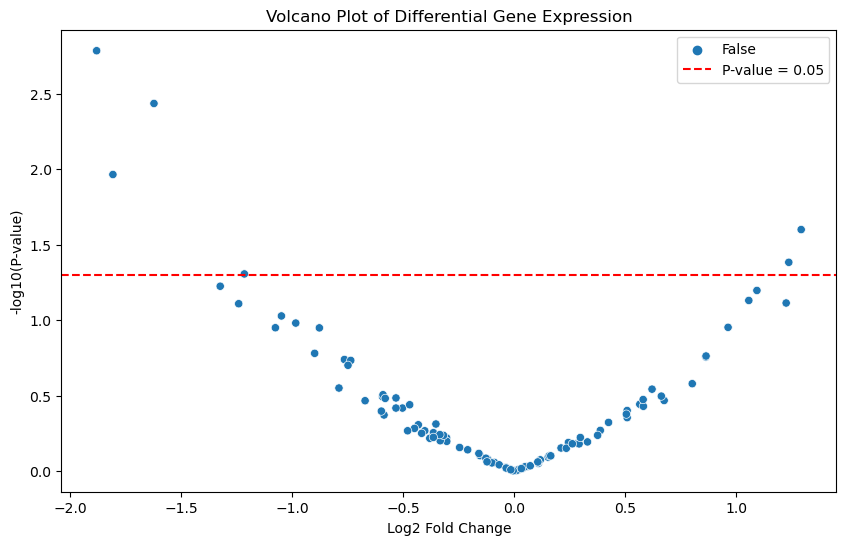